In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


In [3]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression='gzip')

DF.shape

(24916, 2701)

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [5]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


In [6]:
DF.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2696    0
2697    0
2698    0
2699    0
2700    0
Length: 2701, dtype: int64

In [7]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]
print(X.shape, y.shape)
print(type(X))

(24916, 2700) (24916,)
<class 'pandas.core.frame.DataFrame'>


In [8]:
import numpy as np

print(type(X.iloc[5]))
print(type(X.iloc[5].values))
print(type(X.iloc[5].values.astype(np.int)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


G80스포츠


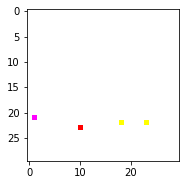

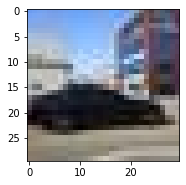

In [9]:
import numpy as np
import matplotlib.pyplot as plt

print(y.iloc[5])
plt.subplot(1,2,1)
plt.imshow(X.iloc[5].values.astype(np.float).reshape(30,30,3))
plt.show()

plt.subplot(1,2,2)
plt.imshow(X.iloc[5].values.astype(np.int).reshape(30,30,3))
plt.show()

In [10]:
print(len(y.value_counts()))
print(y.value_counts())

34
투싼            1931
i30           1296
싼타페           1282
그랜저HG240       940
KONA 1         840
그랜저            770
소나타 YF         762
소나타 뉴라이즈       725
G90            714
소나타 하이브리드      664
아슬란            659
소나타 LF         653
더뉴아반떼AD        653
제네시스G380       652
소나타 LPI        646
엑센트            641
아반떼 XD         639
제네시스 G80       638
아반떼MD          636
소나타            635
아이오닉 하이브리드     633
투싼1            628
팰리세이드          628
그랜저 IG         627
아반떼AD          627
벨로스터           620
아이오닉 일렉트릭      620
에쿠스            619
스타렉스           614
맥스크루즈          605
G80스포츠         605
소나타 NF         605
제네시스 G70       600
더뉴그랜드스타렉스      509
Name: 2700, dtype: int64


In [11]:
X = X.values
y = y.values
print(X[:5], y[:5])

[[230 236 252 ... 55 54 52]
 [235 238 243 ... 124 123 118]
 [94 112 134 ... 80 91 95]
 [80 88 90 ... 104 114 124]
 [215 229 194 ... 81 96 101]] ['G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠']


In [12]:
print(len(X))

24916


In [13]:
X = X.astype(float)/255
print(X.shape)
X = X.reshape(24916,2700)
print( X[:1])

(24916, 2700)
[[0.90196078 0.9254902  0.98823529 ... 0.21568627 0.21176471 0.20392157]]


In [14]:
X = X.reshape(24916,30,30,3)
X.shape

(24916, 30, 30, 3)

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_LE = encoder.fit_transform(y)
y_LE

array([ 0,  0,  0, ..., 33, 33, 33])

In [16]:
from keras.utils import to_categorical

y = to_categorical(y_LE)
print(y[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(30,30,3))

ValueError: ignored

In [ ]:
from 